<a href="https://colab.research.google.com/github/Sau1o/visaoComputacional/blob/main/Autoencoders_para_compress%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoders para compressão de imagens

# Autoencoder linear

## Importação das bibliotecas

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.8.0'

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/mnist/

In [35]:
from tensorflow.keras.datasets import mnist

In [36]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [37]:
28 * 28

784

In [38]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [39]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

In [40]:
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
y_treinamento[0]

5

## Visualização das imagens

In [42]:
np.random.randint(0, 60000)

24746

8


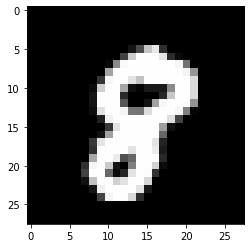

In [43]:
i = np.random.randint(0, 60000)
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray');

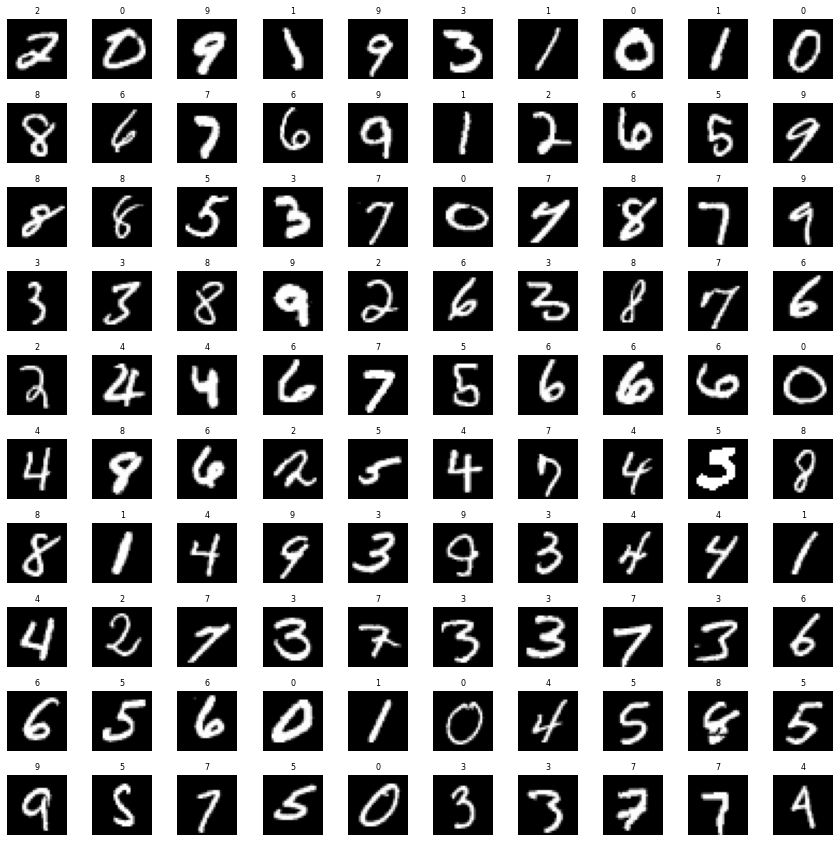

In [44]:
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))
#print(axes.shape)
axes = axes.ravel() # (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, 100):
  indice = np.random.randint(0, 60000)
  axes[i].imshow(X_treinamento[indice], cmap='gray')
  axes[i].set_title(y_treinamento[indice], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [45]:
X_treinamento[0].min(), X_treinamento[0].max()

(0, 255)

In [46]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [47]:
X_treinamento[0].min(), X_treinamento[0].max()

(0.0, 1.0)

In [48]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [49]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [50]:
28 * 28

784

In [51]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], X_treinamento.shape[1] * X_treinamento.shape[2])
X_treinamento.shape

(60000, 784)

In [52]:
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2])
X_teste.shape

(10000, 784)

## Construção e treinamento do autoencoder linear

In [53]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

# Codificação
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Imagem codificada

# Decodificação
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [54]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [55]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [57]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1525 - accuracy: 0.0100
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1100 - accuracy: 0.0122
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1004 - accuracy: 0.0118
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0955 - accuracy: 0.0122
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0927 - accuracy: 0.0123
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0906 - accuracy: 0.0132
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0890 - accuracy: 0.0132
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0879 - accuracy: 0.0137
Epoch 9/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0871 - accuracy: 0.0140
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

## Codificação das imagens

In [58]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [59]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_6_input')>

In [61]:
autoencoder.get_layer('dense_8').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_8')>

In [62]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_8').output)

In [63]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


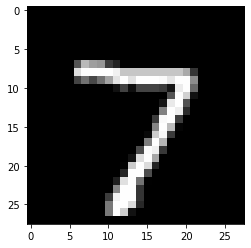

In [64]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

In [65]:
X_teste[0].shape

(784,)

In [66]:
X_teste[0].reshape(1, -1).shape

(1, 784)

In [67]:
imagem_codificada = encoder.predict(X_teste[0].reshape(1, -1))

In [68]:
imagem_codificada

array([[2.354549 , 5.3212914, 8.443872 , 3.5629053, 3.1847625, 5.1749725,
        3.0847328, 0.       , 0.       , 0.       , 5.9767866, 4.651699 ,
        2.82364  , 5.8064013, 4.788167 , 3.4182558, 7.798026 , 3.9095376,
        4.1054077, 0.       , 6.7882385, 6.6113324, 0.8032151, 4.0890126,
        7.7499743, 3.552619 , 1.712597 , 5.414889 , 5.173751 , 2.6528249,
        3.7190828, 1.2970618]], dtype=float32)

In [69]:
imagem_codificada.shape

(1, 32)

In [70]:
8 * 4

32

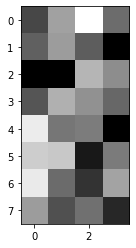

In [71]:
plt.imshow(imagem_codificada.reshape(8,4), cmap='gray');

## Decodificação das imagens

In [72]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [73]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [74]:
imagem_decodificada = decoder.predict(imagem_codificada)

In [75]:
imagem_decodificada.shape

(1, 784)

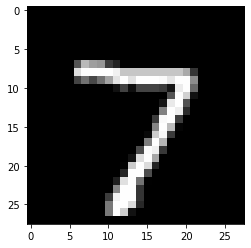

In [76]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

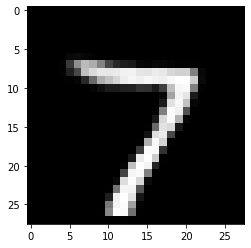

In [77]:
plt.imshow(imagem_decodificada.reshape(28,28), cmap='gray');

## Codificação e decodificação das imagens de teste

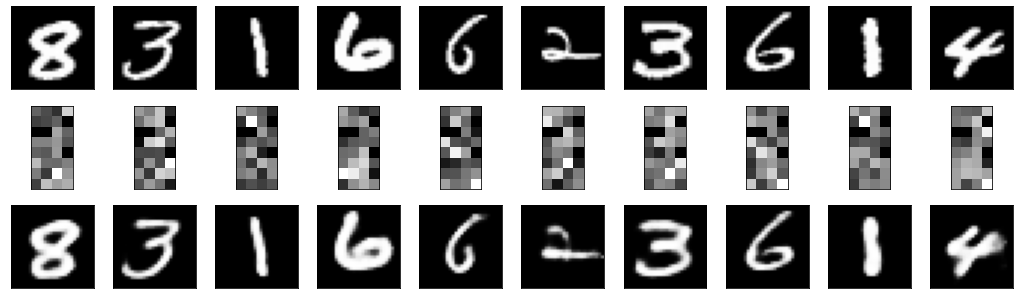

In [78]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
#print(imagens_teste)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  #print(i, imagem_indice)
  
  # Imagens originais
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens)
  imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1,-1))
  plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(decoder.predict(imagem_codificada).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

# Autoencoder convolucional

## Importação das bibliotecas

In [79]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [80]:
from tensorflow.keras.datasets import fashion_mnist

In [81]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [82]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [83]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

## Visualização das imagens

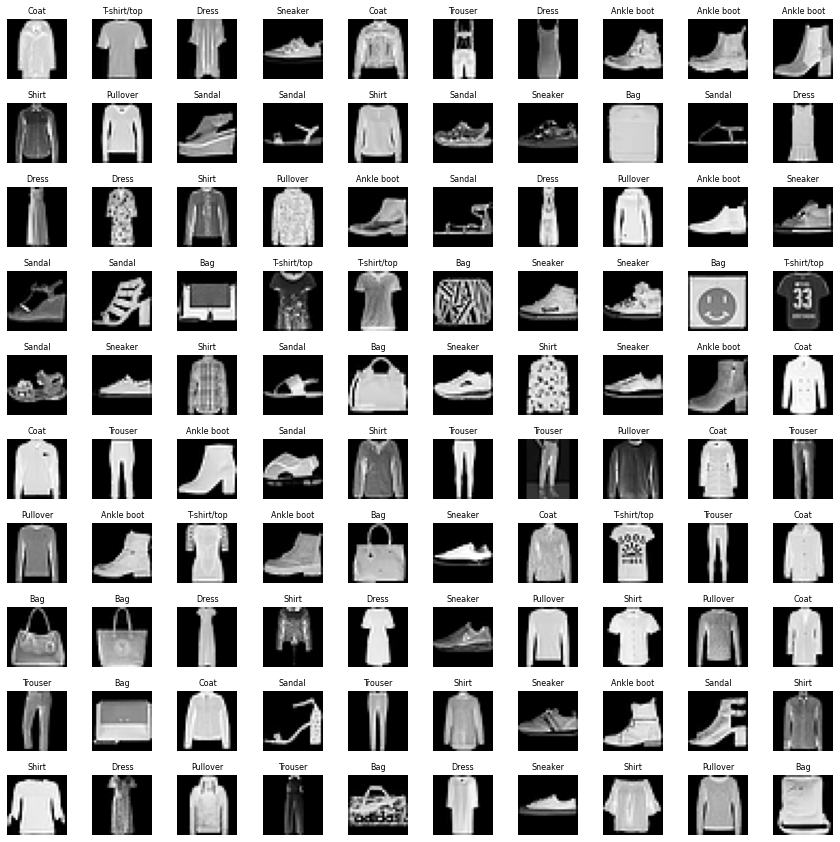

In [84]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
largura = 10
altura = 10
fig, axes = plt.subplots(altura, largura, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, largura * altura):
    indice = np.random.randint(0, 60000)
    axes[i].imshow(X_treinamento[indice], cmap = 'gray' )
    axes[i].set_title(classes[y_treinamento[indice]], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [85]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [86]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [87]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 28, 28, 1))
X_teste = X_teste.reshape((len(X_teste), 28, 28, 1))

In [88]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Construção e treinamento do autoencoder convolucional

In [89]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output = (28 - 3 + 1) / 1 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output = (16 - 3 + 1) / 1 -> (14, 14, 16)

In [90]:
(16 - 3 + 1) / 1

14.0

In [91]:
(28 - 3 + 1) / 1

26.0

In [92]:
4 * 4 * 8

128

In [93]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3452 - accuracy: 0.5012
Epoch 2/50
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3596 - accuracy: 0.4989
Epoch 3/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3324 - accuracy: 0.5003
Epoch 4/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3264 - accuracy: 0.5023
Epoch 5/50
1875/1875 [==============================] - 92s 49ms/step - loss: 0.3347 - accuracy: 0.5018
Epoch 6/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3255 - accuracy: 0.5024
Epoch 7/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3162 - accuracy: 0.5031
Epoch 8/50
1875/1875 [==============================] - 99s 53ms/step - loss: 0.3141 - accuracy: 0.5039
Epoch 9/50
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3186 - accuracy: 0.5036
Epoch 10/50
1875/1875 [==============================] - 92s 49

## Codificação e decodificação das imagens de teste

In [95]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [96]:
autoencoder.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [97]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584 

In [98]:
imagens_teste_codificadas = encoder.predict(X_teste)

In [99]:
imagens_teste_codificadas.shape

(10000, 128)

In [100]:
imagens_teste_codificadas[0]

array([0.        , 0.11971636, 0.00637618, 0.17833939, 0.00792065,
       0.02896556, 0.17201203, 0.        , 0.        , 0.1552557 ,
       0.03616841, 0.20402476, 0.02172672, 0.        , 0.24905203,
       0.        , 0.        , 0.03441042, 0.        , 0.10227986,
       0.15144467, 0.        , 0.18591824, 0.        , 0.09716137,
       0.03626809, 0.02328805, 0.03178736, 0.02599218, 0.02119599,
       0.14538139, 0.        , 0.        , 0.18331553, 0.05249418,
       0.22499904, 0.04705273, 0.        , 0.07944624, 0.03478345,
       0.31933534, 0.16187605, 0.1154765 , 0.23409775, 0.        ,
       0.        , 0.        , 0.07537696, 0.6360398 , 0.        ,
       0.4733539 , 0.        , 0.        , 0.6791234 , 0.22266495,
       0.04350231, 0.4465903 , 0.        , 0.43396336, 0.        ,
       0.        , 0.8094449 , 0.20588762, 0.056826  , 0.42320395,
       0.        , 0.296244  , 0.11235926, 0.        , 0.18077563,
       0.587893  , 0.07354338, 0.50590473, 0.        , 0.09868

In [ ]:
imagens_teste_decodificadas = autoencoder.predict(X_teste)

In [ ]:
imagens_teste_decodificadas.shape

In [ ]:
16 * 8

In [ ]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  # Imagem original
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10,10, i+1+numero_imagens)
  plt.imshow(imagens_teste_codificadas[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10,10, i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decodificadas[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())